In [1]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

mpl.rc('font', family='serif', size=16)

In [36]:
# Generate sample data
centers = [[1,1], [-1,-1], [1,-1]]

x, labels_true = make_blobs(n_samples=300, centers=centers, 
                            cluster_std=0.5, random_state=0)

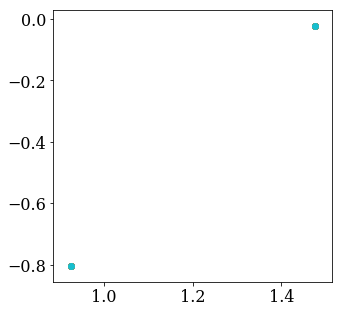

In [44]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

for xp in x:
    ax.scatter(x[0], x[1])

In [37]:
# Do affine propagation
af = AffinityPropagation(preference=-50).fit(x) # what is preference?

cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

In [38]:
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))

Estimated number of clusters: 3
Homogeneity: 0.872
Completeness: 0.872
V-measure: 0.872


In [39]:
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x, labels, metric='sqeuclidean'))

Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753


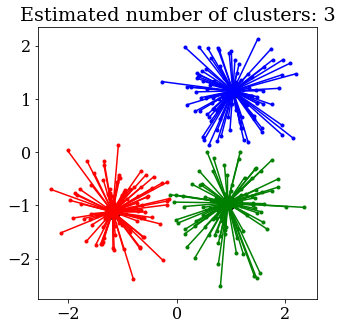

In [41]:
# Plot the result
from itertools import cycle

fig, ax = plt.subplots(1,1,figsize=(5,5))

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = (labels == k)
    cluster_center = x[cluster_centers_indices[k]]
    
    ax.plot(x[class_members, 0], x[class_members, 1], col + '.')
    ax.plot(cluster_center[0], cluster_center[1], 'o',
            markerfacecolor=col, markeredgecolor='k', markersize=14)
    
    for x_mem in x[class_members]:
        ax.plot([cluster_center[0], x_mem[0]], [cluster_center[1], x_mem[1]], col)
        
ax.set_title('Estimated number of clusters: %d' % n_clusters_)